# Data Project from Freedom Debt Relief - Solution


# Assignment
Imagine that Freedom ran a recent marketing campaign to promote the value proposition of how the debt relief program helps people achieve financial freedom. Assume the cost of this campaign was $5 million. There are five months of data in the datasets provided. Let’s say campaign took place over the course of the third month. You now want to show the marketing, sales and operations teams just how successful this campaign was.

Using the three datasets given:

1. Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?

2. Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?

3. How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question #1.

Assume the following:

- There is no seasonality in the results, and the campaign spend was distributed evenly across Month 3 (i.e., spend on the first day is the same as spend on the last day).
- Channel mix, targeting, and efficiency are outside the scope of this exercise.
- There may be data provided that is not useful in your end presentation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
client_data= pd.read_csv(r"C:\Users\Gautam\Desktop\jnotebook\Projects\Stratascratch_Freedom_debt_relief\datasets\client_data.csv")
client_data.head()

,client_id,client_geographical_region,client_residence_status,client_age
0,538839486596724,Northeast,Rent,91
1,321708286091707,West,Own,83
2,848531901757235,Midwest,Own,84
3,854405182328779,Northeast,Own,83
4,769102176031316,West,Own,85


In [4]:
deposit_data= pd.read_csv(r"C:\Users\Gautam\Desktop\jnotebook\Projects\Stratascratch_Freedom_debt_relief\datasets\deposit_data.csv")
deposit_data.head()

,client_id,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,446495122764671,Actual Deposit,303.0,Monthly,2019-10-23
1,446495122764671,Actual Deposit,303.0,Monthly,2019-09-23
2,446495122764671,Scheduled Deposit,303.0,Monthly,2019-09-23
3,446495122764671,Scheduled Deposit,303.0,Monthly,2019-10-23
4,446495122764671,Scheduled Deposit,303.0,Monthly,2019-06-23


In [5]:
calendar_data= pd.read_csv(r"C:\Users\Gautam\Desktop\jnotebook\Projects\Stratascratch_Freedom_debt_relief\datasets\calendar_data.csv")
calendar_data.head()

,gregorian_date,month_name
0,2019-06-01,Month 1
1,2019-06-02,Month 1
2,2019-06-03,Month 1
3,2019-06-04,Month 1
4,2019-06-05,Month 1


We will execute the merging in two steps:

- Merge the client and the deposit data frames on the client ID column
- Merge the resulting data frame from Step 1. with the calendar data set on the deposit / Gregorian date

In [6]:
df= pd.merge(client_data,deposit_data, on='client_id')
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11
1,321708286091707,West,Own,83,Actual Deposit,200.0,Extra,2019-10-19
2,321708286091707,West,Own,83,Actual Deposit,50.0,Extra,2019-08-26
3,321708286091707,West,Own,83,Scheduled Deposit,200.0,Monthly,2019-08-01
4,321708286091707,West,Own,83,Actual Deposit,200.0,Monthly,2019-09-01


In [7]:
df= pd.merge(df,calendar_data,left_on='deposit_date',right_on='gregorian_date')
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,2019-07-11,Month 2


The resulting data frame contains two columns representing the date; one is in the gregorian date format, while the other is in the deposit date format. We remove the column with the gregorian date format.

# Data Cleaning

In [8]:
df.drop('deposit_date',axis=1,inplace=True)
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,gregorian_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2


In [9]:
df.rename(columns={"gregorian_date":"deposit_date"},inplace=True)
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480394 entries, 0 to 480393
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   client_id                   480394 non-null  int64  
 1   client_geographical_region  480394 non-null  object 
 2   client_residence_status     480394 non-null  object 
 3   client_age                  480394 non-null  int64  
 4   deposit_type                480394 non-null  object 
 5   deposit_amount              480394 non-null  float64
 6   deposit_cadence             480394 non-null  object 
 7   deposit_date                480394 non-null  object 
 8   month_name                  480394 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 36.7+ MB


In [11]:
df.isna().sum()

client_id                     0
client_geographical_region    0
client_residence_status       0
client_age                    0
deposit_type                  0
deposit_amount                0
deposit_cadence               0
deposit_date                  0
month_name                    0
dtype: int64

# Data Exploration

In [12]:
df['client_geographical_region'].value_counts()

West         205629
South        108004
Midwest       88185
Northeast     78576
Name: client_geographical_region, dtype: int64

In [13]:
df['client_residence_status'].value_counts()

Own     345432
Rent    134962
Name: client_residence_status, dtype: int64

In [14]:
df['client_age'].describe()

count    480394.000000
mean         52.192469
std          13.773928
min          21.000000
25%          41.000000
50%          52.000000
75%          62.000000
max         105.000000
Name: client_age, dtype: float64

<AxesSubplot:xlabel='client_age', ylabel='Count'>

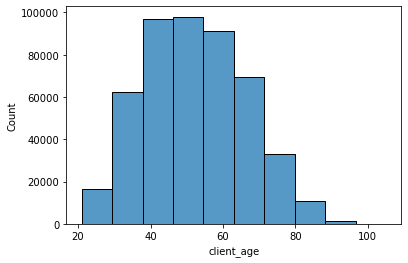

In [15]:
sns.histplot(df['client_age'], bins=10)

In [16]:
df['month_name'].value_counts()

Month 3    108505
Month 4    107494
Month 5    106363
Month 2     80205
Month 1     77827
Name: month_name, dtype: int64

In [17]:
df['deposit_date'].max(),df['deposit_date'].min()

('2019-10-31', '2019-06-01')

So, the data spans from 01 June 2019 to 31 October 2019.

In [18]:
df['deposit_type'].value_counts()

Scheduled Deposit    247986
Actual Deposit       232408
Name: deposit_type, dtype: int64

In [19]:
df['deposit_cadence'].value_counts()

Monthly     262858
Biweekly    209189
Extra         8347
Name: deposit_cadence, dtype: int64

In [20]:
df['deposit_date']=pd.to_datetime(df['deposit_date'])

month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    39675057.10
Month 4    38515819.73
Month 5    38081175.23
Name: deposit_amount, dtype: float64


Text(0, 0.5, 'Amount')

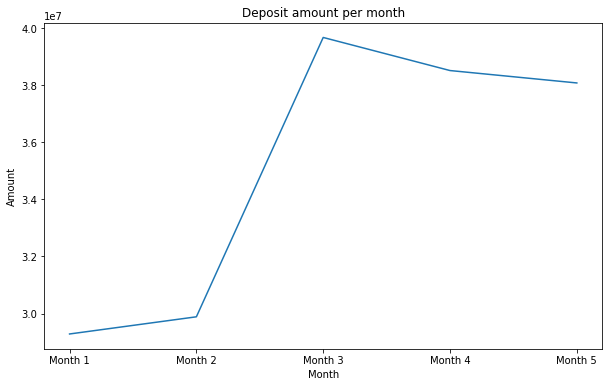

In [21]:
amount_by_month=df.groupby('month_name')['deposit_amount'].sum()
print(amount_by_month)
plt.figure(figsize=(10,6))
plt.plot(amount_by_month)
plt.title("Deposit amount per month")
plt.xlabel('Month')
plt.ylabel('Amount')


Text(0, 0.5, 'Number of deposits')

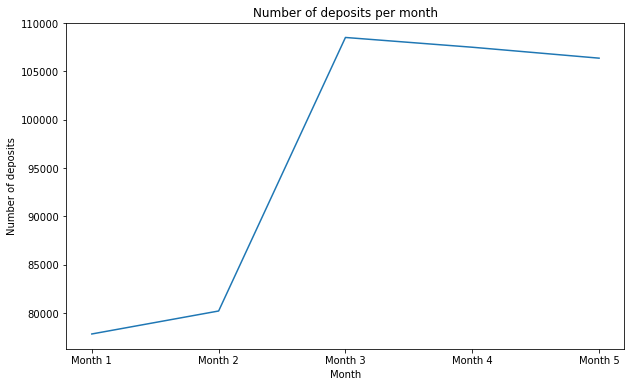

In [22]:
count_deposits_by_month= df.groupby('month_name').size()
plt.figure(figsize=(10,6))
plt.plot(count_deposits_by_month)
plt.title("Number of deposits per month")
plt.xlabel('Month')
plt.ylabel('Number of deposits')

Text(0, 0.5, 'Deposit amount')

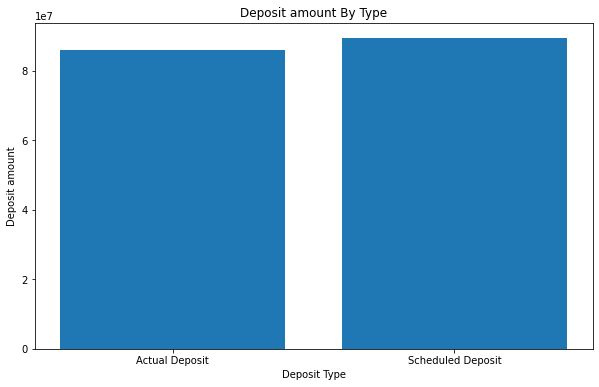

In [23]:
deposit_amount_by_type=df.groupby('deposit_type')['deposit_amount'].sum()
plt.figure(figsize=(10,6))
plt.bar(deposit_amount_by_type.index,deposit_amount_by_type)
plt.title("Deposit amount By Type")
plt.xlabel('Deposit Type')
plt.ylabel('Deposit amount')

Text(0, 0.5, 'Deposit amount')

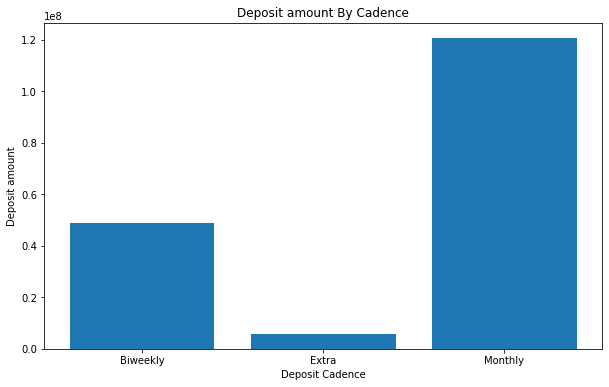

In [24]:
deposit_amount_by_cadence=df.groupby('deposit_cadence')['deposit_amount'].sum()
plt.figure(figsize=(10,6))
plt.bar(deposit_amount_by_cadence.index,deposit_amount_by_cadence)
plt.title("Deposit amount By Cadence")
plt.xlabel('Deposit Cadence')
plt.ylabel('Deposit amount')

<AxesSubplot:title={'center':'Deposit amount per month and status'}, xlabel='month_name', ylabel='deposit_amount'>

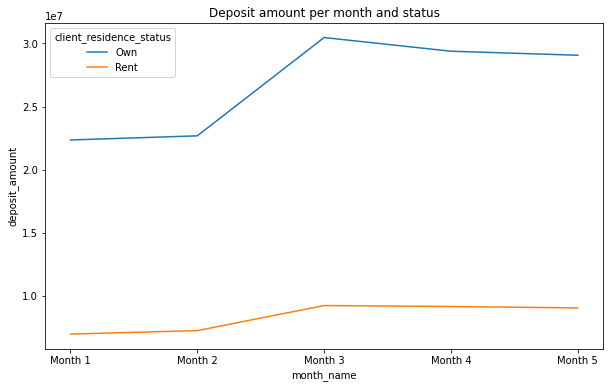

In [25]:
client_status_month_amount=df.groupby(['month_name' ,'client_residence_status'])['deposit_amount'].sum().to_frame('deposit_amount')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and status")
sns.lineplot(x=client_status_month_amount.index.get_level_values('month_name'),
             y=client_status_month_amount['deposit_amount'],data='client_status_month_amount', 
             hue = client_status_month_amount.index.get_level_values('client_residence_status'))

<AxesSubplot:title={'center':'Deposit amount per month and deposit type'}, xlabel='month_name', ylabel='deposit_amount'>

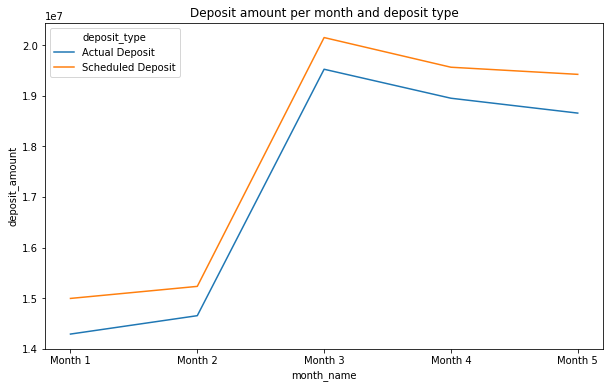

In [26]:
deposit_type_month_amount=df.groupby(['month_name' ,'deposit_type'])['deposit_amount'].sum().to_frame('deposit_amount')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and deposit type")
sns.lineplot(x=deposit_type_month_amount.index.get_level_values('month_name'),
             y=deposit_type_month_amount['deposit_amount'],data='deposit_type_month_amount', 
             hue = deposit_type_month_amount.index.get_level_values('deposit_type'))

<AxesSubplot:title={'center':'Deposit amount per month and cadence'}, xlabel='month_name', ylabel='deposit_amount'>

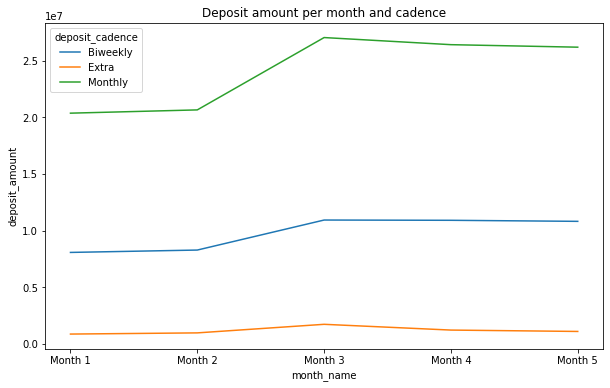

In [27]:
deposit_cadence_month_amount=df.groupby(['month_name' ,'deposit_cadence'])['deposit_amount'].sum().to_frame('deposit_amount')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and cadence")
sns.lineplot(x=deposit_cadence_month_amount.index.get_level_values('month_name'),
             y=deposit_cadence_month_amount['deposit_amount'],data='deposite_cadence_month_amount', 
             hue = deposit_cadence_month_amount.index.get_level_values('deposit_cadence'))

<AxesSubplot:title={'center':'Deposit amount per month and region'}, xlabel='month_name', ylabel='deposit_amount'>

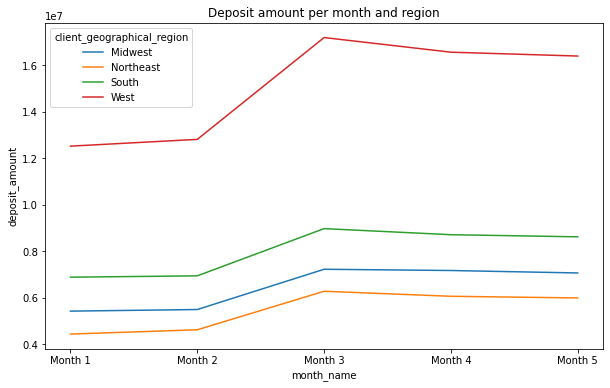

In [28]:
region_month_amount=df.groupby(['month_name' ,'client_geographical_region'])['deposit_amount'].sum().to_frame('deposit_amount')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and region")
sns.lineplot(x=region_month_amount.index.get_level_values('month_name'),
             y=region_month_amount['deposit_amount'],data='region_month_amount', 
             hue = region_month_amount.index.get_level_values('client_geographical_region'))

# Question 1

__Provide a quantitative assessment of whether the marketing campaign was successful. How and why did you choose your specific success metric(s)?__

We can see from the above line plot titled "Deposit amount per month" that a huge spike can be noticed for the Month 3 (i.e. between months of July and August in the current year). This coincides with ad-campaign running in the 3rd month.

- The Freedom Debt Relief recieved almost `$10 Million` increment in the month in which the campaign was running<br>

- After the marketing campaign, the overall deposit amount begins to decrease gradually, but it remains higher than the pre-campaign levels. The amount of deposits in the month directly following the campaign is `$8.5 million`, and in the last month of the data, it is `$8 million`<br>

- The cost of the advertising campaign was `$5 million`, and it resulted in a total increase in deposits of `$26.5 million`. Based on online research, the company charges a fee of `18-25%` for its services, but there is no information on how this fee is calculated for individual clients. Assuming the lowest fee of `18%` for all clients, the company's profits increase by `$4.77 million (26.5M * 18$%)`. Although this might appear to be a loss of `$230K` for the campaign, it is important to note that the upward trend in deposits would have been much lower without the campaign. Additionally, it is unlikely that the minimum fee is applicable to all clients, so this is the most pessimistic estimate.

We can also see this through the following operations.

In [29]:
clients_before_ad= df[(df['month_name']=='Month 1')|(df['month_name']=='Month 2')]['client_id'].unique()
clients_before_ad.shape

(34051,)

In [31]:
clients_during_ad=df[(df['month_name']=='Month 3')]['client_id'].unique()
clients_during_ad.shape

(43806,)

In [32]:
clients_after_ad= df[(df['month_name']=='Month 4')|(df['month_name']=='Month 5')]['client_id'].unique()
clients_after_ad.shape

(41862,)

__Question:__ How many new clients were acquired while the ad campaign was running?

In [33]:
len(set(clients_during_ad).difference(set(clients_before_ad)))

11544

__Question:__ How many new clients were acquired after the ad campaign ran?

In [34]:
len(set(clients_after_ad).difference(set(clients_during_ad).union(set(clients_before_ad))))

752

# Question 2

__Based on the provided data, how would you recommend campaign strategy be adjusted in the future to improve performance?__



The majority of the plots demonstrate consistent patterns over time, making it challenging to provide recommendations. 

However, one approach that could be explored further is targeted marketing. It is noticeable from the age histogram and the count per residence status in the EDA section that the majority of individuals in the data are middle-aged (between 40-60 years old) and homeowners. 

To further investigate this, we will display a plot depicting the deposit amount changes over time and age groups (with age being divided by 10).

In [35]:
df['age_group']=(df['client_age']/10).astype(int)
df.head()

,client_id,client_geographical_region,client_residence_status,client_age,deposit_type,deposit_amount,deposit_cadence,deposit_date,month_name,age_group
0,538839486596724,Northeast,Rent,91,Actual Deposit,10000.0,Extra,2019-07-11,Month 2,9
1,773610304672603,West,Rent,24,Scheduled Deposit,100.0,Biweekly,2019-07-11,Month 2,2
2,773610304672603,West,Rent,24,Actual Deposit,100.0,Biweekly,2019-07-11,Month 2,2
3,552219454660531,West,Own,85,Scheduled Deposit,290.0,Biweekly,2019-07-11,Month 2,8
4,55107102575545,Midwest,Own,83,Scheduled Deposit,438.0,Monthly,2019-07-11,Month 2,8


<AxesSubplot:title={'center':'Deposit amount per month and Age group'}, xlabel='month_name', ylabel='deposit_amount'>

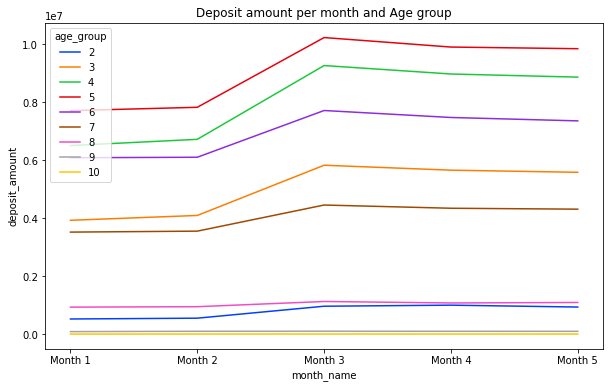

In [36]:
age_grp_month_deposit= df.groupby(['month_name','age_group'])['deposit_amount'].sum().to_frame('deposit_amount')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and Age group")
sns.lineplot(x=age_grp_month_deposit.index.get_level_values('month_name'),
             y=age_grp_month_deposit['deposit_amount'],data='age_grp_month_deposit', 
             hue = age_grp_month_deposit.index.get_level_values('age_group'),
             palette= 'bright')

We can observe that there is not much increase in middle-aged customers and negligible increase in old-age customers. Better engagement with the middle-aged customers could result in more deposits.

In [39]:
own_age_deposit= df[(df["client_residence_status"] == "Own") & (df["client_age"] <= 60) & (df["client_age"] >= 40)]
own_age_deposit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181068 entries, 307 to 479525
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   client_id                   181068 non-null  int64         
 1   client_geographical_region  181068 non-null  object        
 2   client_residence_status     181068 non-null  object        
 3   client_age                  181068 non-null  int64         
 4   deposit_type                181068 non-null  object        
 5   deposit_amount              181068 non-null  float64       
 6   deposit_cadence             181068 non-null  object        
 7   deposit_date                181068 non-null  datetime64[ns]
 8   month_name                  181068 non-null  object        
 9   age_group                   181068 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(5)
memory usage: 14.5+ MB


<AxesSubplot:title={'center':'Deposit amount per month and Type'}, xlabel='month_name', ylabel='Count'>

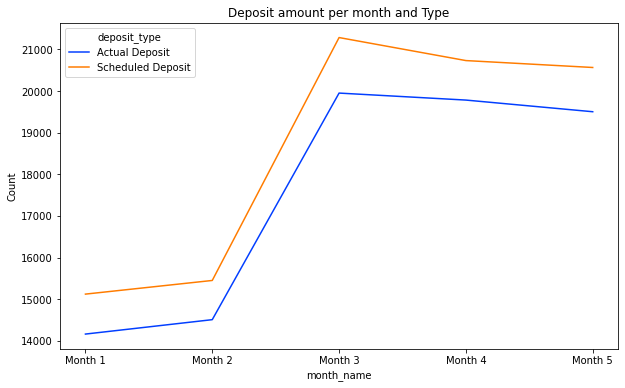

In [44]:
own_age_type_deposit=own_age_deposit.groupby(['month_name','deposit_type'])['deposit_type'].count().to_frame('Count')
plt.figure(figsize=(10,6))
plt.title("Deposit amount per month and Type")
sns.lineplot(x=own_age_type_deposit.index.get_level_values('month_name'),
             y=own_age_type_deposit['Count'],data='own_age_type_deposit', 
             hue = own_age_type_deposit.index.get_level_values('deposit_type'),
             palette= 'bright')

In [46]:
own_age_deposit_extra= own_age_deposit[own_age_deposit["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
df_extra= df[df["deposit_cadence"] == "Extra"]["deposit_amount"].sum()
             
own_age_deposit_extra/df_extra

0.4234867523021417

In [47]:
own_age_deposit['client_id'].count()/df['client_id'].count()

0.3769156150992727

Out of all the clients, this particular subgroup is accountable for 42% of the additional deposited funds, despite comprising only 37% of the total customer base.

In [48]:
df[df["deposit_cadence"] == "Extra"]["client_geographical_region"].value_counts()

West         3570
South        1991
Midwest      1486
Northeast    1300
Name: client_geographical_region, dtype: int64

In [49]:
df[df["deposit_cadence"] == "Extra"]["client_residence_status"].value_counts()

Own     5856
Rent    2491
Name: client_residence_status, dtype: int64

In [50]:
df[df["deposit_cadence"] == "Extra"]["deposit_type"].value_counts()

Actual Deposit    8347
Name: deposit_type, dtype: int64

In [51]:
df[df["deposit_cadence"] == "Extra"]["month_name"].value_counts()

Month 3    2235
Month 4    1898
Month 5    1846
Month 2    1274
Month 1    1094
Name: month_name, dtype: int64

To summarize the information provided earlier:

- Extra deposits are mostly concentrated in the West region, which is consistent with the overall deposit patterns.
- Clients who own their homes are more than twice as likely to make extra deposits compared to those who rent.
- Month 3, during which the campaign was conducted, saw the highest number of extra deposits, and post-campaign figures show a 33% increase in extra deposits compared to pre-campaign.

# Question 3

__How do you think campaign performance would have changed if we did not run the campaign in Month 3, but instead postponed it until month 6? Provide an incremental number versus your result in Question 1.__

To simulate the effect of postponing the campaign, we can take the following steps:

1. Determine which clients made their initial deposit during the third month, which we assume were acquired due to the campaign.
2. Delay their deposits by three months, so they occur after the fifth month.
3. Conduct the same analyses as in Question 1, comparing the results with and without the postponed deposits to understand the impact of delaying the campaign.

Summarize the differences observed in the analyses.

In [53]:
new_clients = set(clients_during_ad).difference(set(clients_before_ad))

In [57]:
df_copy = df.copy(deep=True)


In [58]:
import datetime

def simulate_campaign_postponement(row):
    if row.client_id in new_clients:
        row.deposit_date = pd.to_datetime(row.deposit_date) + datetime.timedelta(days=90)
        if row.month_name == "Month 3":
            row.month_name = "Month 6"
        elif row.month_name == "Month 4":
            row.month_name = "Month 7"
        elif row.month_name == "Month 5":
            row.month_name = "Month 8"
    else:
        row.deposit_date = pd.to_datetime(row.deposit_date)
    return row
df_copy = df_copy.apply(func=simulate_campaign_postponement, axis=1)

Deposit amount per month month_name
Month 1    29284830.86
Month 2    29886431.27
Month 3    30002419.69
Month 4    27306769.25
Month 5    28138150.45
Month 6     9672637.41
Month 7    11209050.48
Month 8     9943024.78
Name: deposit_amount, dtype: float64


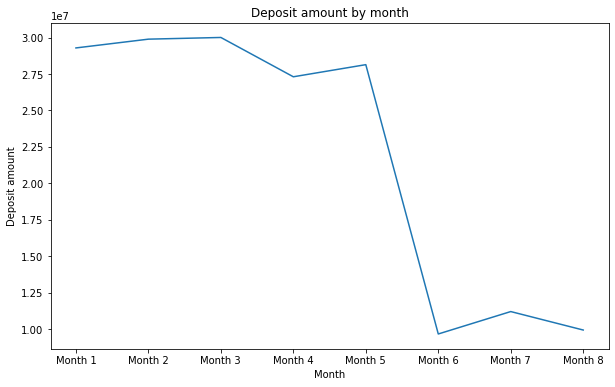

In [60]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()

print("Deposit amount per month", deposit_amount_by_month)

plt.figure(figsize=(10,6))
_ = plt.plot(deposit_amount_by_month)
_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")

The plots may appear unusual because for months 6, 7, and 8, we only have data from new customers, which is typically lower than the overall average deposit amount.

To address this issue and simulate the deposits from existing customers, we can add an average deposit amount from the preceding months to the new customer data.

In [61]:
avg_monthly_deposit = (df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()).mean()


In [62]:
avg_monthly_deposit


21930414.273749996

month_name
Month 1    2.928483e+07
Month 2    2.988643e+07
Month 3    3.000242e+07
Month 4    2.730677e+07
Month 5    2.813815e+07
Month 6    3.160305e+07
Month 7    3.313946e+07
Month 8    3.187344e+07
Name: deposit_amount, dtype: float64


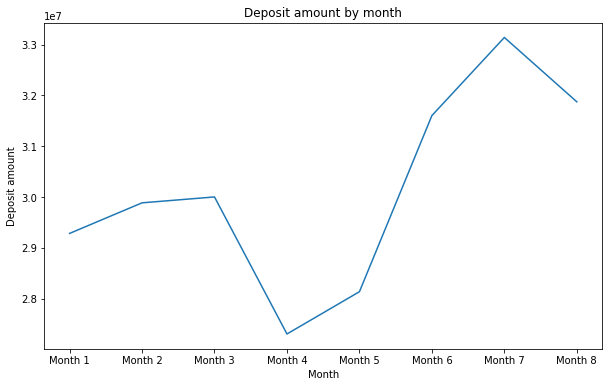

In [64]:
deposit_amount_by_month = df_copy.groupby(by=df_copy["month_name"])["deposit_amount"].sum()


deposit_amount_by_month.at["Month 6"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 7"] += avg_monthly_deposit
deposit_amount_by_month.at["Month 8"] += avg_monthly_deposit

print(deposit_amount_by_month)

plt.figure(figsize=(10,6))
_ = plt.plot(deposit_amount_by_month)

_ = plt.title("Deposit amount by month")
_ = plt.ylabel("Deposit amount")
_ = plt.xlabel("Month")


Based on the simulation results, the impact of postponing the campaign on Freedom Debt Relief's deposit amounts can be summarized as follows:

- During the month when the campaign was conducted, the increase in deposit amounts was approximately `$2.5 million`, compared to the `$10 million` increase observed in Question 1.
- Following the campaign, total deposit amounts continued to rise, peaking at `$33 million` in the month after the campaign. In the final month, deposit amounts declined slightly to `$31 million` but remained higher than pre-campaign levels.
- The campaign cost `$5 million`, and the additional deposits resulting from the campaign amounted to `$8 million`. This is significantly lower than the `$26 million` increase calculated in Question 1, indicating that postponing the campaign would not have been a wise decision.